# COMP534 - Applied AI, Assessment 1: Supervised learning methods for solving a classification problem

### -- Pragyan Jyoti Dutta (StudentID: 201771610)

## Importing the required packages

In [1]:
# importing the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, average_precision_score,precision_recall_curve
from sklearn.preprocessing import label_binarize

## Loading the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/dataset_assignment1.csv')

## Exploratory Data Analysis (EDA)

##### Let us perform some Exploratory Data Analysis to know more about the dataset

In [ ]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


In [ ]:
df.shape

(700, 10)

In [ ]:
df.isna().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
feature9    0
class       0
dtype: int64

From the above we see that we have no missing values in our dataset which is a good thing for us.

In [ ]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,4.415714,3.131429,3.204286,2.804286,3.214286,3.557143,3.437143,2.864286,1.588571,0.344286
std,2.814236,3.050343,2.970958,2.854153,2.213193,3.613026,2.436676,3.052265,1.713995,0.475475
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


The above describe function provides us valuable statistics about our data which we have summarised later in the notebook.

In [ ]:
df['class'].unique()

array([0, 1])

- We have only two classes; class 0 and class 1

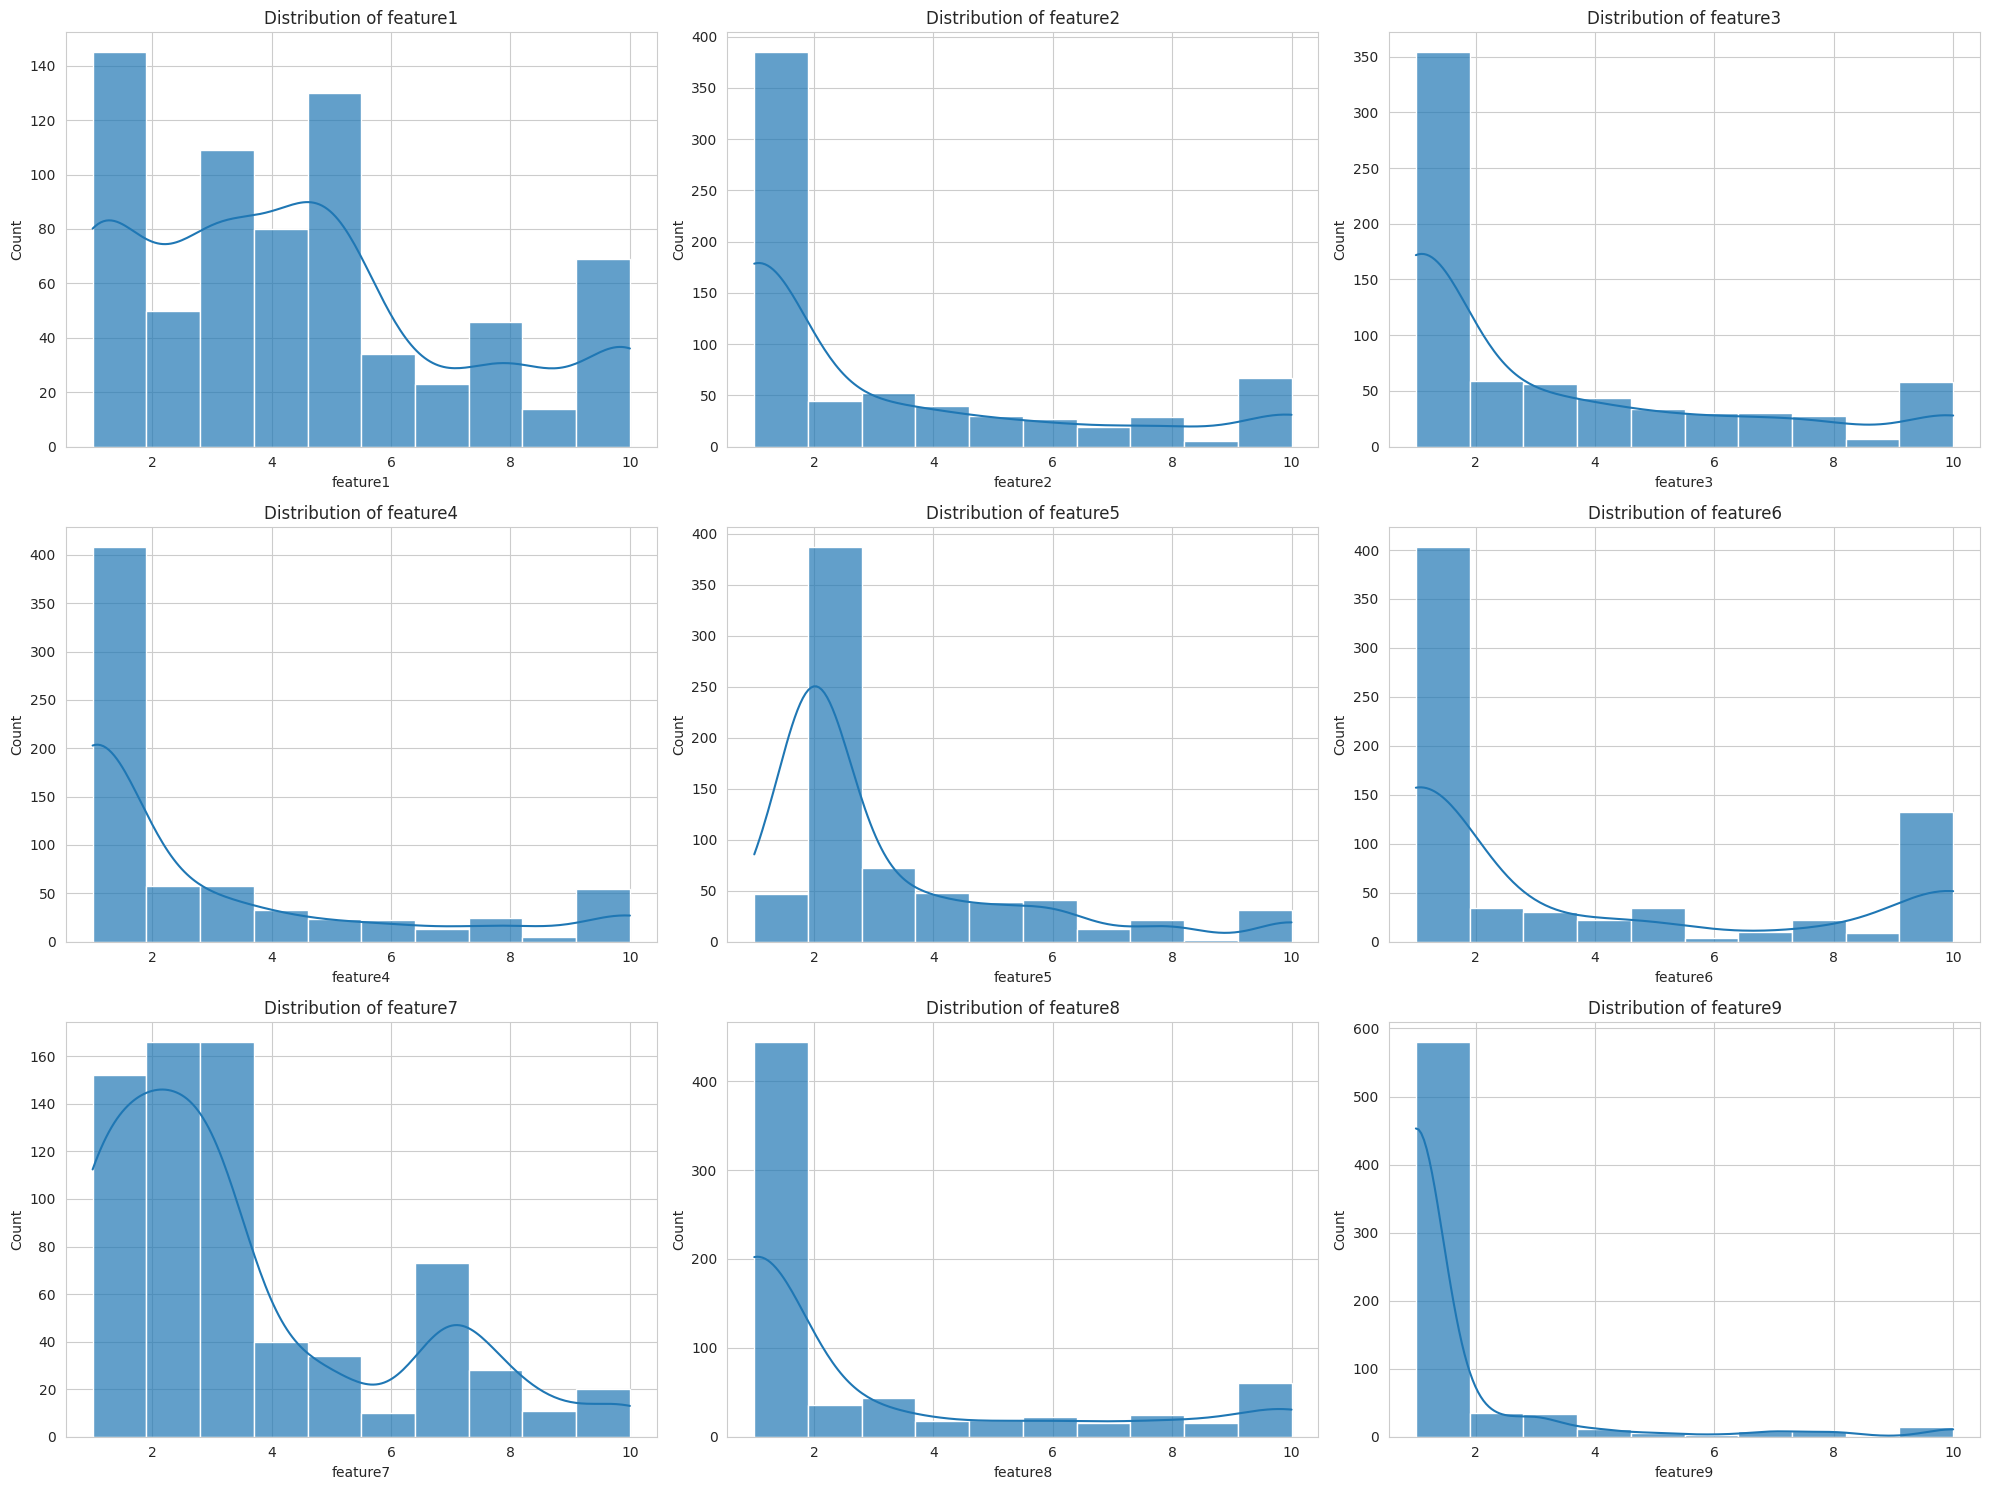

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of our plot
sns.set_style("whitegrid")

# Plot histograms for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(df.columns[:-1], 1):  # Excluding the 'class' column
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=10, alpha=0.7)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


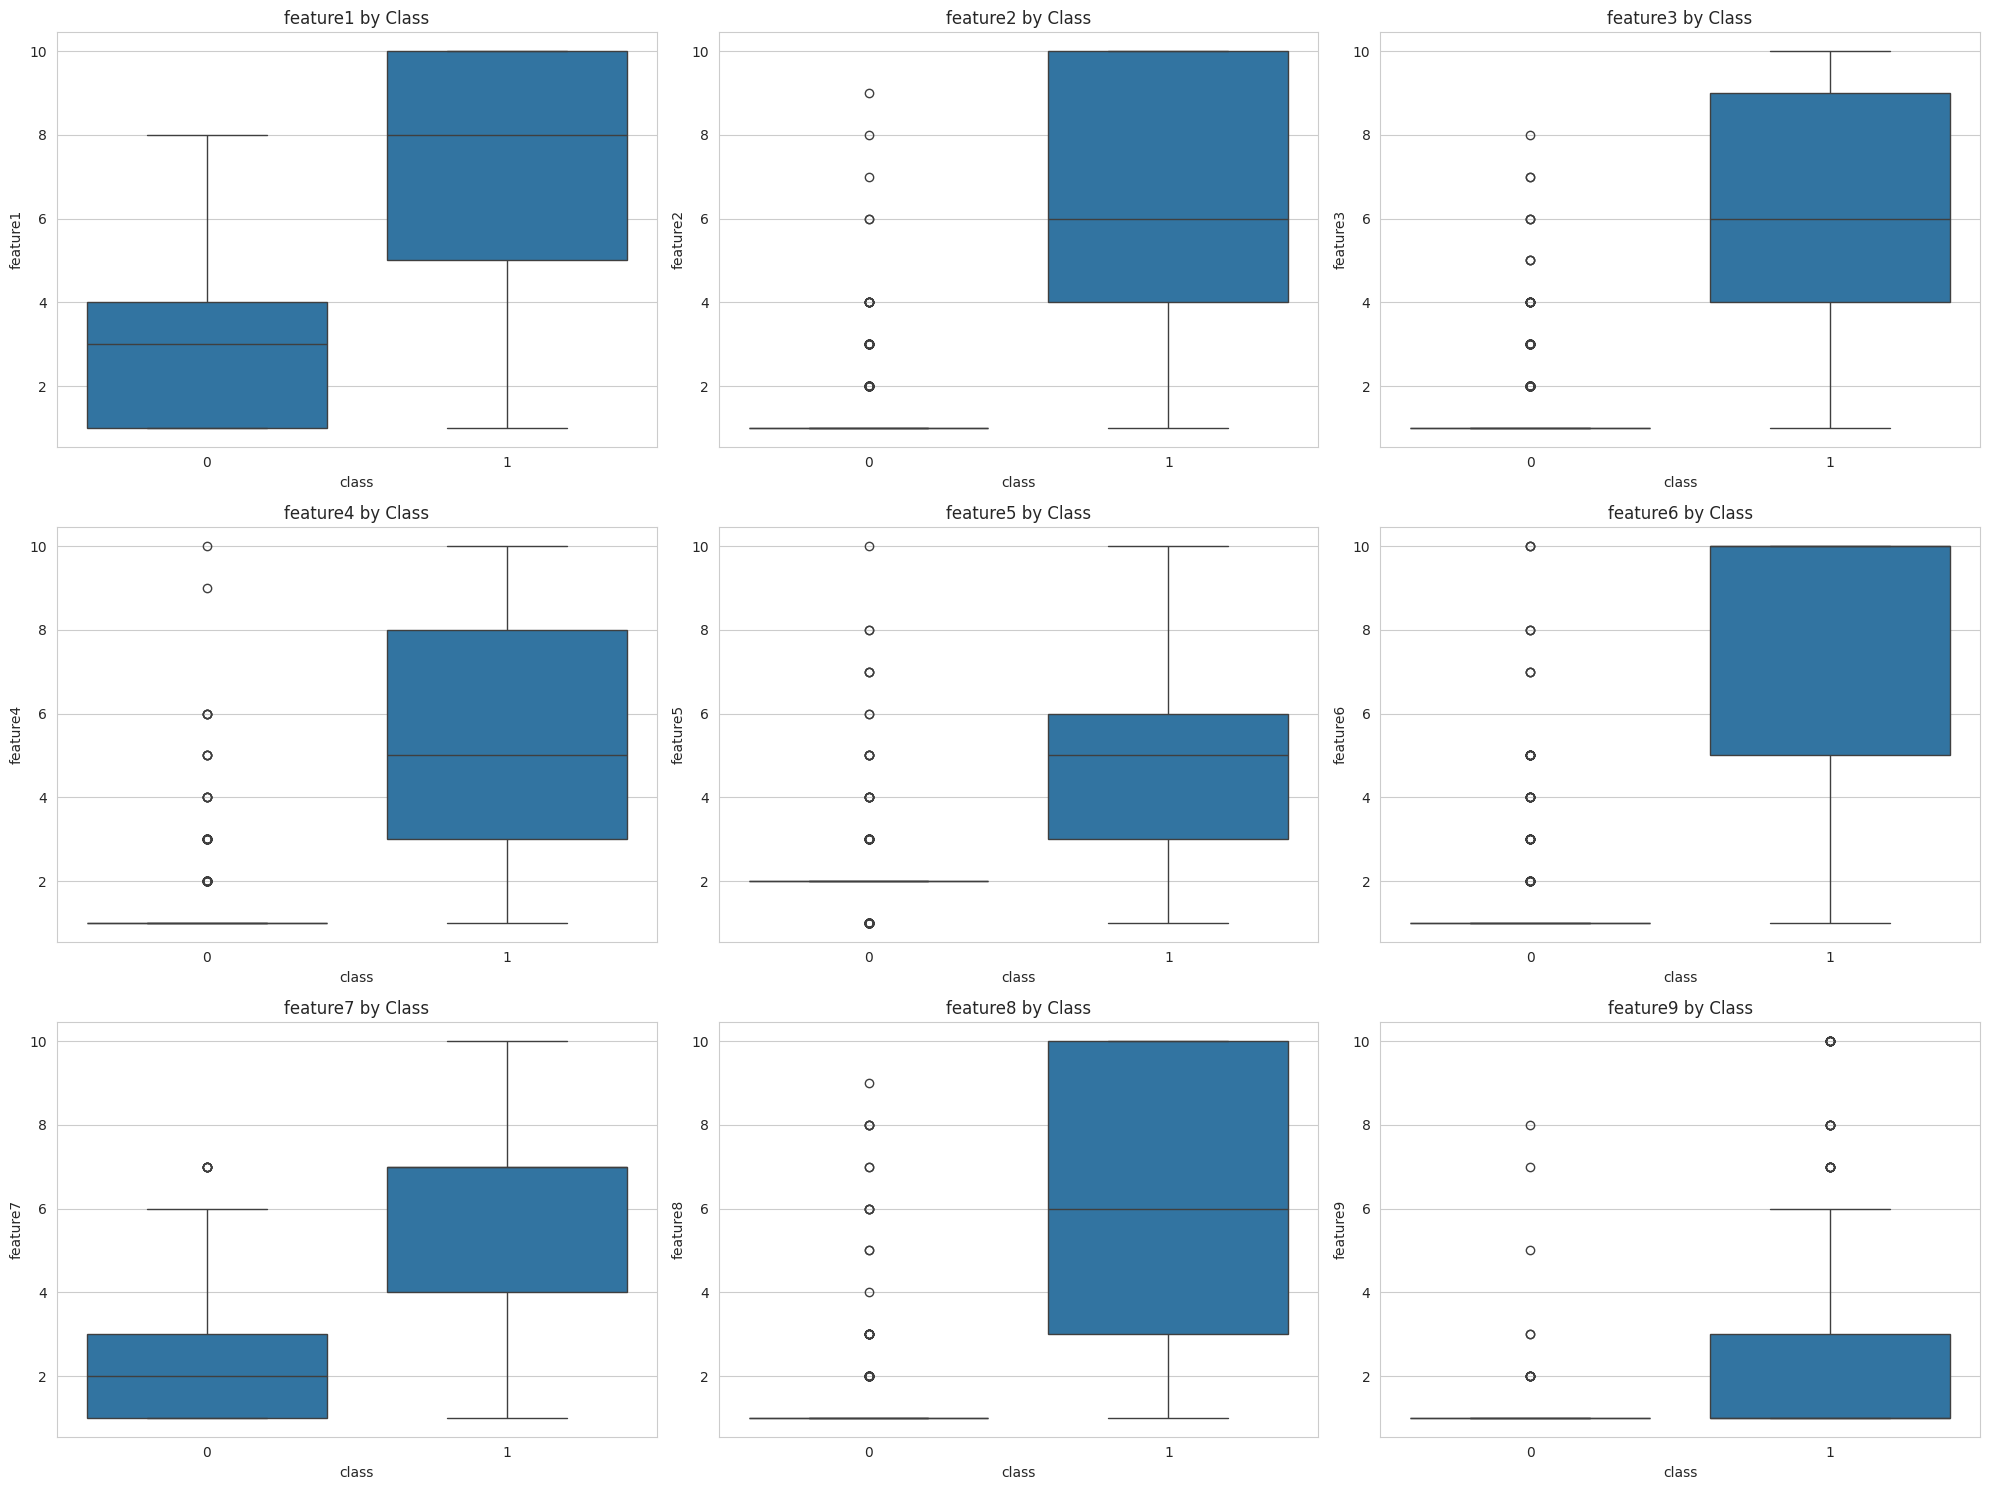

In [ ]:
# Plot box plots for each feature by class
plt.figure(figsize=(20, 15))
for i, feature in enumerate(df.columns[:-1], 1):  # Excluding the 'class' column
    plt.subplot(3, 3, i)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'{feature} by Class')

plt.tight_layout()
plt.show()


- The distributions of values across different classes vary significantly for many features, suggesting these features are good discriminators between the classes. For example, **feature2, feature3, feature4, feature5, feature7, and feature8** show distinct differences in their _median_ values between the two classes. This indicates that these features could be important for predicting the class.

- There are noticeable outliers in several features across both classes.

- The variance within each class also varies across features, with some features showing a wider range of values for one class over the other.

In [ ]:
df0=(df['class'] == 0).sum()
df1=(df['class'] == 1).sum()

print("Number of samples for class 0 is equal to",df0)
print("Number of samples for class 1 is equal to",df1)

Number of samples for class 0 is equal to 459
Number of samples for class 1 is equal to 241


<ipython-input-17-07bbe29c4dcb>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['class'],kde=True,palette='hot')


<Axes: xlabel='class', ylabel='Count'>

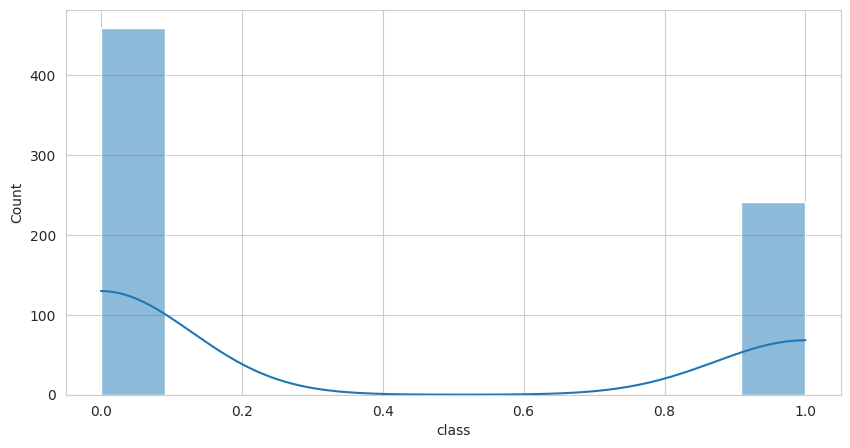

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df['class'],kde=True,palette='hot')

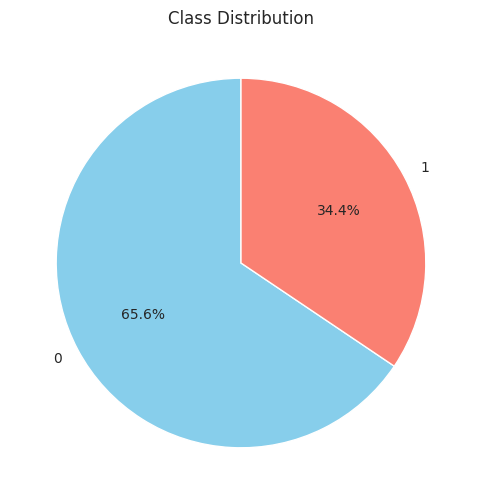

In [ ]:
#A pie chart to show class imbalance
plt.figure(figsize=(8, 6))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


The above plot tells us that:

- Number of samples for:
  - **class 0** is **459** amounting to about **65.6%**
  - **class 1** is **241** amounting to about **34.4%**
  - This shows that we have a class imbalance in our dataset where class 1 is almost twice of that of class 0.
  - This suggests applying class imbalance techniques like **SMOTE, RandomOverSampler or ADYSN** might be a good idea.
  - However, we will refrain from applying them since it is a slight imbalance and those techniques are usually used for extremely imbalanced datasets.
  
Some of the statistical values for different input features are as follows:

|       | feature1 | feature2 | feature3 | feature4 | feature5 | feature6 | feature7 | feature8 | feature9 |
|-------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| count | 700.0    | 700.0    | 700.0    | 700.0    | 700.0    | 700.0    | 700.0    | 700.0    | 700.0    |
| mean  | 4.415714 | 3.131429 | 3.204286 | 2.804286 | 3.214286 | 3.557143 | 3.437143 | 2.864286 | 1.588571 |
| std   | 2.814236 | 3.050343 | 2.970958 | 2.854153 | 2.213193 | 3.613026 | 2.436676 | 3.052265 | 1.713995 |
| min   | 1.0      | 1.0      | 1.0      | 1.0      | 1.0      | 1.0      | 1.0      | 1.0      | 1.0      |
| 25%   | 2.0      | 1.0      | 1.0      | 1.0      | 2.0      | 1.0      | 2.0      | 1.0      | 1.0      |
| 50%   | 4.0      | 1.0      | 1.0      | 1.0      | 2.0      | 1.0      | 3.0      | 1.0      | 1.0      |
| 75%   | 6.0      | 5.0      | 5.0      | 4.0      | 4.0      | 6.0      | 5.0      | 4.0      | 1.0      |
| max   | 10.0     | 10.0     | 10.0     | 10.0     | 10.0     | 10.0     | 10.0     | 10.0     | 10.0     |



- The values for our dataset ranges between 1 and 10.

- Finally, there are 700 records for each of the 10 columns , i.e. we have a table of shape 700*10.

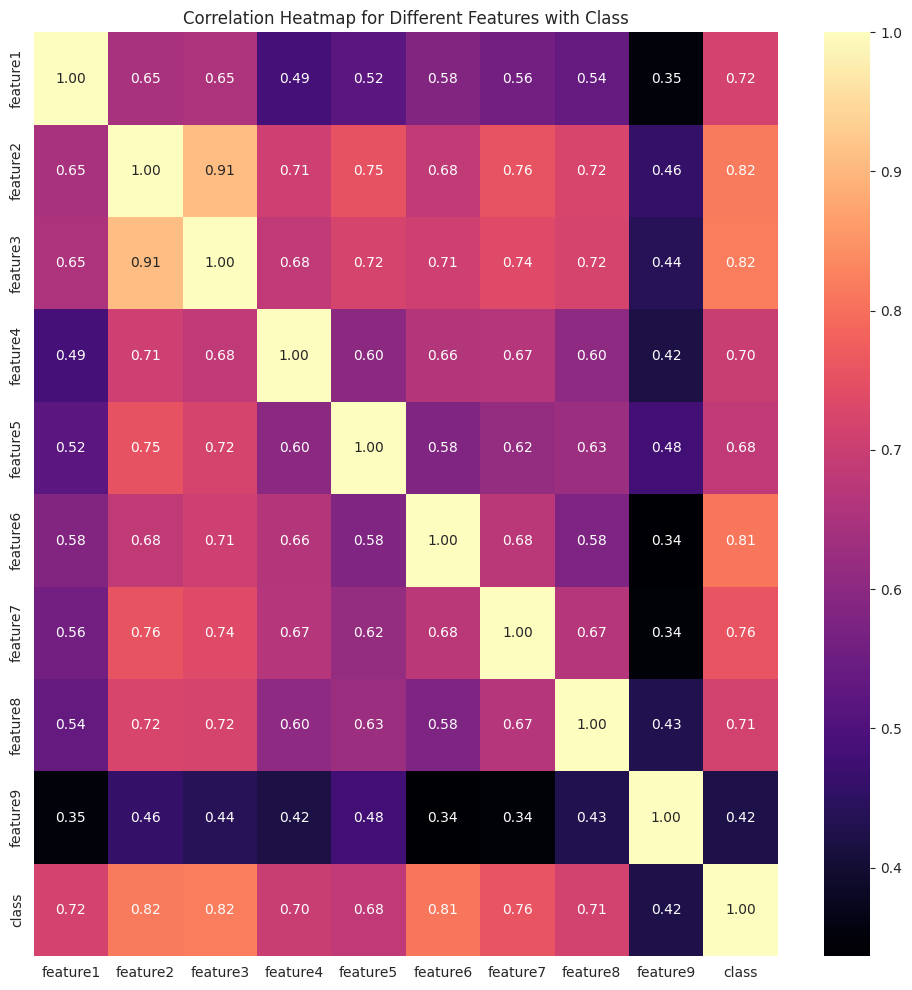

In [ ]:
# Let us calculate the correlation matrix
correlation = df.corr()

# Generating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Heatmap for Different Features with Class')
plt.show()

From the above heatmap, it is evident that:

- Certain features show moderate to strong positive correlations with the class variable, suggesting that these features have a significant relationship with the class label and could be important predictors.

- There are also correlations between some of the features, which might indicate multicollinearity. This is when two or more independent variables are highly correlated and can potentially affect the performance of some machine learning models.

## Data Preprocessing

Before splitting our data into training, validation and test data, we need to identify our target variable which is the **class** column.

In [ ]:
X = df.drop("class",axis=1)
y = df["class"]

Next, we scale our data using the MinMaxScaler to have our values between 0 and 1 for the features.

In [ ]:
# scale the data for more consistent values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Splitting our dataset into train and test data

In [ ]:
# Splitting the dataset into the Training set, Validation set, and Test set
X_train, X_2, y_train, y_2 = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training, 40% for Validation and Testing

# Splitting the rest of the data into 50% validation, 50% test which means 20% of all data is used for validation and 20% for testing
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=42)

![picture](https://drive.google.com/uc?export=view&id=1LgvL5sqG2qaf6mU8c3d_kwEPu5OuQwTR)

#### Determining our evaluation metric

Before we move forward to our model building process, it is essential for us to determine the evaluation metric to evaluate our model.

Since our dataset is an imbalanced dataset; hence we choose **f1-macro score** which is the harmonic mean of precision and recall as our evaluation metric as this would be more apt compared to _accuracy_ which might be a biased metric in this case.

In [ ]:
# Defining some functions for evaluations

#Function to print Classification report and confusion matrix for Validation data
def evaluation_matrix(name,data, y_true, y_pred):
    """
    This function prints the classification report and confusion matrix for given predictions.

    Parameters:
    - name(str): Name of the model.
    - data(str): The type of data we are inputting (e.g- Train, Validation, Test)
    - y_true: True labels.
    - y_pred: Predicted labels.
    """
    # Printing the classification report
    print(f'Classification Report for {data} of {name}:\n{classification_report(y_true, y_pred)}\n')

    # Calculating and printing the f1-macro score
    f1_macro = f1_score(y_true, y_pred, average='macro')
    print(f'F1 Macro Score for {data} in {name}: {f1_macro}\n')

    # Plotting the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Spectral')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    print("----------------------------------------------------------------------")

In [ ]:
def plot_precision_recall_curve(name, clf, X, y_true):
    """
    Plots the Precision-Recall curve for the given classifier and dataset.

    Parameters:
    - name: Name of the model.
    - clf: Trained classifier.
    - X: Input features to make predictions.
    - y_true: True labels.
    """
    # Check if the classifier can estimate probabilities or confidence scores
    if hasattr(clf, "predict_proba"):
        y_scores = clf.predict_proba(X)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_scores = clf.decision_function(X)
    else:
        raise ValueError("Classifier does not have a predict_proba or decision_function method.")

    # Calculate precision-recall pairs
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, label=f'AP={average_precision:0.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend(loc="best")
    plt.show()

## Model Building

We have chosen to train our data using the following Classifiers:

- **Naive Bayes**
- **Logistic Regression**
- **RandomForestClassifier**

### Naive Bayes

In [ ]:
# Initialize our model
nb = GaussianNB()

# Fit our model
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Making predictions on the train dataset
nb_predictions_train = nb.predict(X_train)

Classification Report for training data of Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       272
           1       0.91      0.97      0.93       148

    accuracy                           0.95       420
   macro avg       0.94      0.96      0.95       420
weighted avg       0.95      0.95      0.95       420


F1 Macro Score for training data in Naive Bayes: 0.9485936696776088



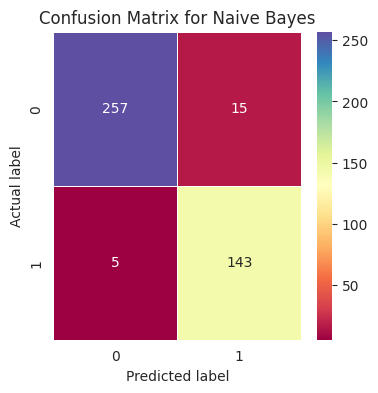

----------------------------------------------------------------------


In [ ]:
evaluation_matrix('Naive Bayes','training data', y_train, nb_predictions_train)

In [ ]:
# Making predictions on the validation dataset
nb_predictions_val = nb.predict(X_val)

Classification Report for validation data of Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        91
           1       0.91      0.98      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140


F1 Macro Score for validation data in Naive Bayes: 0.9537343027098479



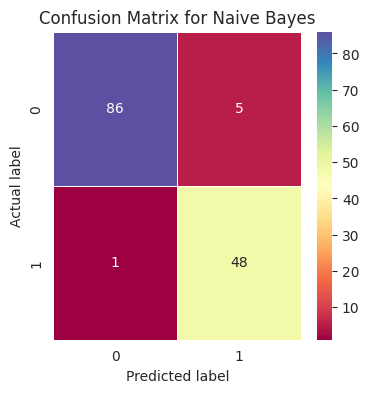

----------------------------------------------------------------------


In [ ]:
evaluation_matrix('Naive Bayes','validation data', y_val, nb_predictions_val)

#### Let us hypertune our parameters to see if we can improve the performance of our model on the training data

In [ ]:
# Define the parameter grid to search over
#var-smoothing is a small constant added to the variance of each feature to prevent zero probabilities, improving model stability and generalization.
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize a KFold instance for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with the GaussianNB model, parameter grid, and KFold instance
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=kf, scoring='f1_macro')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extract the best model and its parameters
best_nb = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Best parameters: {'var_smoothing': 0.1}


Classification Report for training data of Optimized Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       272
           1       0.93      0.97      0.95       148

    accuracy                           0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420


F1 Macro Score for training data in Optimized Naive Bayes: 0.9611683997066057



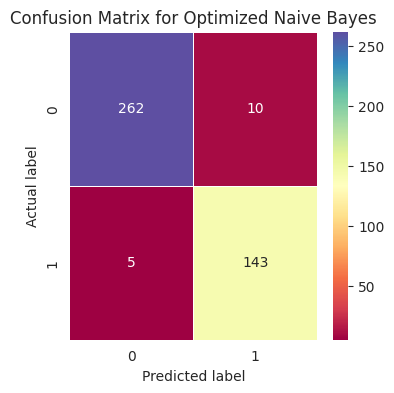

----------------------------------------------------------------------


In [ ]:
# Making predictions with the optimized model on the training
nb_predictions_train_opt = best_nb.predict(X_train)

# Evaluating the optimized model
evaluation_matrix('Optimized Naive Bayes', 'training data', y_train, nb_predictions_train_opt)


We have increased the f1-macro score of our model :
- From **0.949** to **0.961** in our **Training data**
- The best parameters were: {'var_smoothing': 0.1}


#### Predicting on test data

Classification Report for test data of Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.95      0.98        44

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140


F1 Macro Score for test data in Naive Bayes: 0.9832174538479981



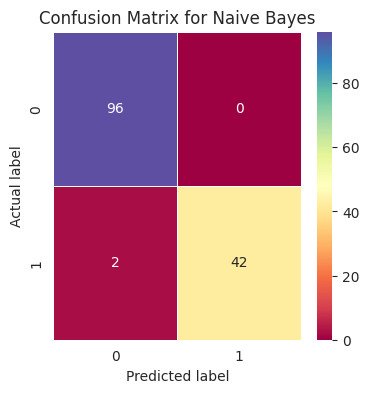

----------------------------------------------------------------------


In [ ]:
# Making predictions on the test dataset with the optimised parameters
nb_predictions_test = best_nb.predict(X_test)

evaluation_matrix('Naive Bayes','test data', y_test, nb_predictions_test)

- We get a f1 macro score of **0.983** on our test data which suggest that our model peforms exceptionally well on unseen data.

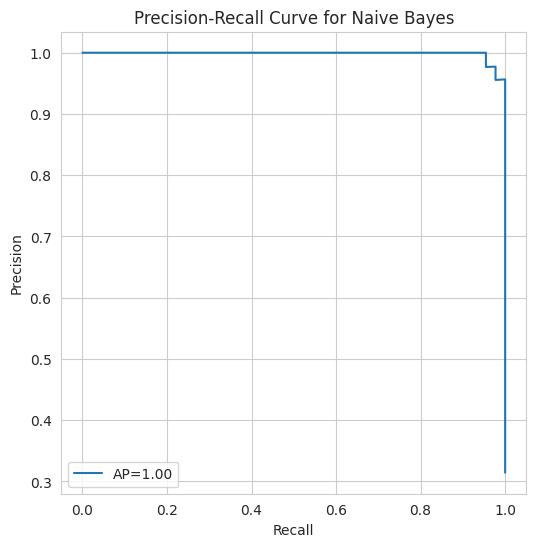

In [ ]:
plot_precision_recall_curve('Naive Bayes', best_nb, X_test, y_test)

- The Precision-Recall curve above shows a very high level of performance from our model. The curve starts offs with a precision and recall of 1 and has only a slight dip; this means that the model was able to retrieve all the relevant instances (high recall) while also being correct in its retrieval (high precision) for most of its predictions.

- The Average Precision (AP) score is noted as 1.00, which suggests that, on average, the model has a perfect precision across different recall levels.

#### **Summary of Naive Bayes**

- Our model performs quite well on training as well as test data.

- There might be a question of our model overfitting seeing the performance on training data. However, that question is answered when we test our model on the test data and it reports high performance over there as well which means our model generalizes data quite well.

- We get a F1 Macro Score of **0.9832** which again shows excellent performance by our model.

- Our model has perfect recall for Class 0  and Class 1 has perfect precision.

- The confusion matrix shows that our model did not make any mistake in identifying False Positives and minimal error in identifying False Negatives; this again shows how well our model performed.

### Logistic Regression

In [ ]:
# Logistic Regression models
lr = LogisticRegression(max_iter=1000)

#Fit our model on the training data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Classification Report for training data of Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       272
           1       0.95      0.95      0.95       148

    accuracy                           0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420


F1 Macro Score for training data in Logistic Regression: 0.9609353200513422



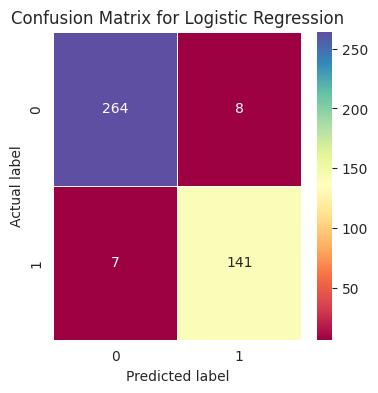

----------------------------------------------------------------------


In [ ]:
#Making predictions on the training data
lr_predictions_train = lr.predict(X_train)
evaluation_matrix('Logistic Regression','training data', y_train, lr_predictions_train)

Classification Report for Validation data of Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.94      0.92      0.93        49

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140


F1 Macro Score for Validation data in Logistic Regression: 0.9447918427130866



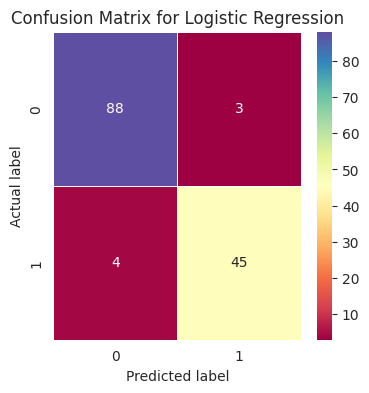

----------------------------------------------------------------------


In [ ]:
#Making predictions on the validation data
lr_predictions_val = lr.predict(X_val)

evaluation_matrix('Logistic Regression','Validation data', y_val, lr_predictions_val)

#### Hyper-parameter tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l1', 'l2'], # Types of regularization
    'solver': ['liblinear'] # Solver that supports L1 penalty
    }

# Define KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=kfold, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters found by GridSearchCV
print(f'Best parameters found: {grid_search.best_params_}')

# Use the best estimator to make predictions
lr_best = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Classification Report for Training Data of Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       272
           1       0.95      0.96      0.95       148

    accuracy                           0.97       420
   macro avg       0.96      0.97      0.96       420
weighted avg       0.97      0.97      0.97       420


F1 Macro Score for Training Data in Logistic Regression: 0.9635949379628024



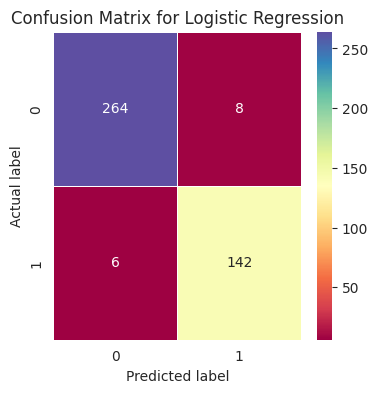

----------------------------------------------------------------------


In [ ]:
# Making predictions on the training data
lr_predictions_train = lr_best.predict(X_train)


# Evaluation
evaluation_matrix('Optimised Logistic Regression', 'Training Data', y_train, lr_predictions_train)


Classification Report for Test Data of Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.95      0.98        44

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140


F1 Macro Score for Test Data in Logistic Regression: 0.9832174538479981



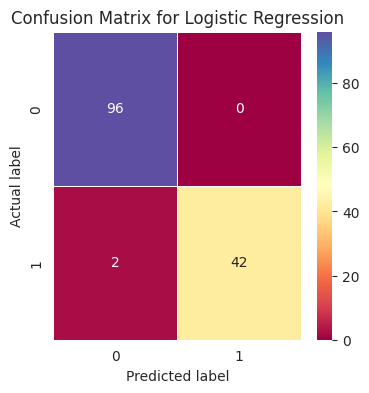

----------------------------------------------------------------------


In [ ]:
# Predict on the test data
lr_predictions_test = lr_best.predict(X_test)

# Evaluation
evaluation_matrix('Logistic Regression', 'Test Data', y_test, lr_predictions_test)

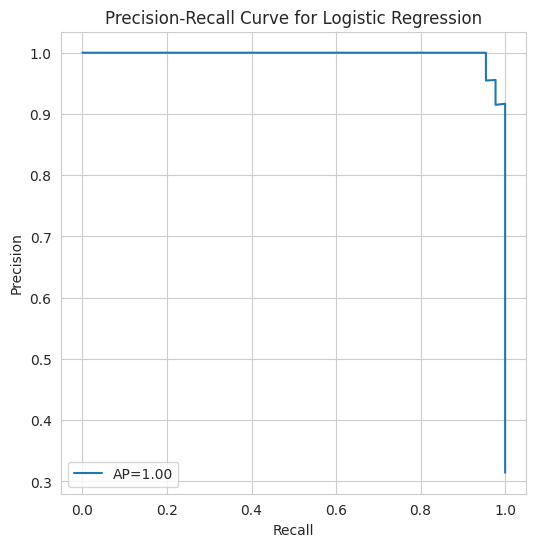

In [ ]:
plot_precision_recall_curve('Logistic Regression', lr_best, X_test, y_test)

#### **Summary of LogisticRegression**

- Our model performs quite well on training as well as test data.

- We get a F1 Macro Score of **0.9832** which again shows excellent performance by our model.

- Our model has perfect recall for Class 0  and Class 1 has perfect precision.

- The confusion matrix shows that our model did not make any mistake in identifying False Positives and minimal error in identifying False Negatives; this again shows how well our model performed.

### RandomForestClassifier

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report for training data of RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       148

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420


F1 Macro Score for training data in RandomForestClassifier: 1.0



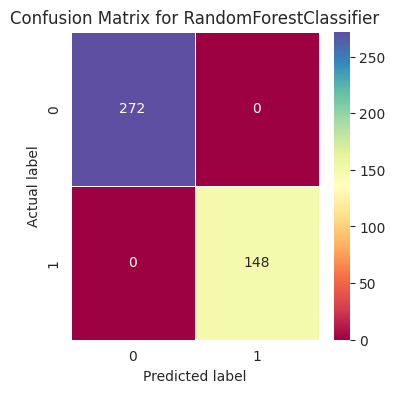

----------------------------------------------------------------------


In [ ]:
rf_predictions_train = rf.predict(X_train)

evaluation_matrix('RandomForestClassifier','training data', y_train, rf_predictions_train)

Classification Report for Validation data of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.92      0.94      0.93        49

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140


F1 Macro Score for Validation data in RandomForestClassifier: 0.945309448071879



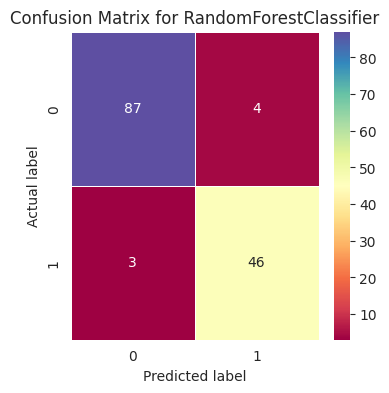

----------------------------------------------------------------------


In [ ]:
rf_predictions_val = rf.predict(X_val)

evaluation_matrix('RandomForestClassifier','Validation data', y_val, rf_predictions_val)

We notice that the performance of our model has dropped off a bit on Validation data which may be attributed to the complex nature of RandomForest trying to learn the data-points instead of generalising it.

#### Hyper-parameter tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Define KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV object with KFold
grid_search = GridSearchCV(rf, param_grid, cv=kfold, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters found by GridSearchCV
print(f'Best parameters found: {grid_search.best_params_}')

# Use the best estimator to make predictions
rf_best = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


Classification Report for Training Data of Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       272
           1       0.96      0.99      0.98       148

    accuracy                           0.98       420
   macro avg       0.98      0.99      0.98       420
weighted avg       0.98      0.98      0.98       420


F1 Macro Score for Training Data in Random Forest: 0.9818785865297494



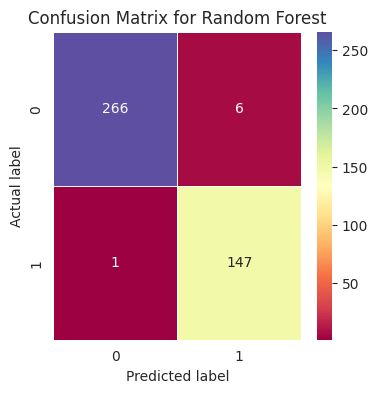

----------------------------------------------------------------------


In [ ]:
# Making predictions on the training and validation data
rf_predictions_train = rf_best.predict(X_train)

# Evaluation (assuming evaluation_matrix function is defined)
evaluation_matrix('Optimised Random Forest', 'Training Data', y_train, rf_predictions_train)

Classification Report for Test Data of RandomForest classifier:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        96
           1       0.91      0.98      0.95        44

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140


F1 Macro Score for Test Data in RandomForest classifier: 0.9592999592999593



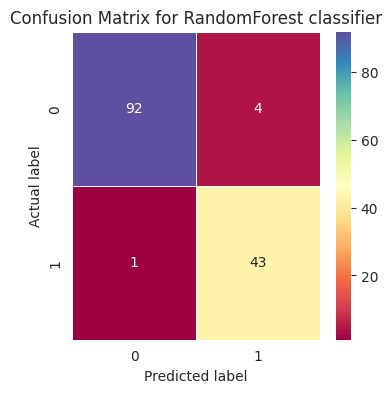

----------------------------------------------------------------------


In [ ]:
# Predict on the test data
rf_predictions_test = rf_best.predict(X_test)

# Evaluation
evaluation_matrix('RandomForest classifier', 'Test Data', y_test, rf_predictions_test)

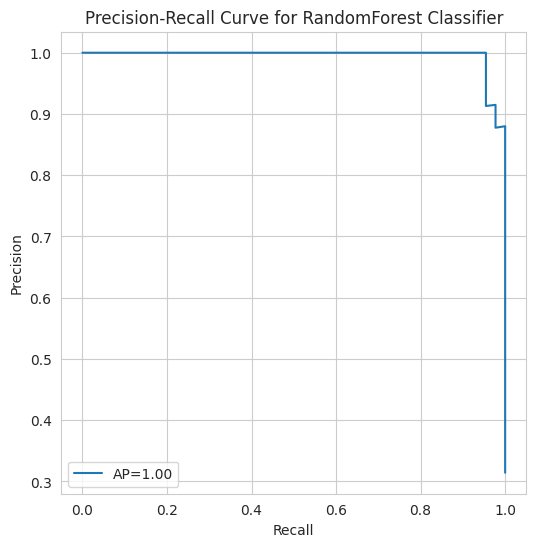

In [ ]:
plot_precision_recall_curve('RandomForest Classifier', rf_best, X_test, y_test)

#### **Summary of RandomForestClassifier**

- Our model performs quite well on training as well as test data.

- We get a F1 Macro Score of **0.959** which again shows excellent performance by our model.


## Summary

- We notice that out of the 3 models tested; **NaiveBayesClassifier** and **LogisticRegression** performs the best on unseen test data.

- Both the models made no errors in identifying False Negatives and False Positives which suggests that they have achieved perfect Precision and Recall which means they can be used for effective _fraud detection, customer targeting, and quality control_ from a business point of view.

-  The models generally performed better on training data after Hyper-parameter tuning except RandomForestClassifier whose performance dropped off on the training data after tuning. However, it did have a high performance on the test data.

### References

- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=Generally%2C%20the%20use%20of%20ROC,moderate%20to%20large%20class%20imbalance.

- https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html


- https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
